In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/CHF_Project

/content/drive/MyDrive/CHF_Project


#mRMR Feature Selection

In [ ]:
import pandas as pd

df = pd.read_csv("Becker_Tube_Dataset.csv")
columns = ['L(m)', 'D(m)', 'p(Mpa)', 'G(kgm-2s-1)', '∆T_sub(k)', 'q(MWm-2)', 'Z_cr(o/p)']

In [ ]:
X = df[['L(m)', 'D(m)', 'p(Mpa)', 'G(kgm-2s-1)', '∆T_sub(k)', 'q(MWm-2)']]
y = df[['Z_cr(o/p)']]
print(X)
print(y)

     L(m)    D(m)  p(Mpa)  G(kgm-2s-1)  ∆T_sub(k)  q(MWm-2)
0     7.0  0.0149   20.01       3100.2       11.5     0.643
1     7.0  0.0149   19.98       3082.5       10.4     0.740
2     7.0  0.0149   20.06       3084.5       11.0     0.836
3     7.0  0.0149   20.01       3103.9       11.0     0.930
4     7.0  0.0149   20.01       3106.5       11.7     1.017
..    ...     ...     ...          ...        ...       ...
416   7.1  0.0247   15.00       2450.0       10.3     0.820
417   7.1  0.0247   15.00       2414.0        9.1     0.850
418   7.1  0.0247   15.00       2412.0       10.5     0.872
419   7.1  0.0247   15.00       2398.0       10.3     0.914
420   7.1  0.0247   15.00       2395.0        9.8     0.941

[421 rows x 6 columns]
     Z_cr(o/p)
0         6.35
1         4.85
2         4.15
3         3.65
4         3.05
..         ...
416       6.30
417       6.00
418       5.80
419       5.20
420       4.80

[421 rows x 1 columns]


In [ ]:
K = 6
import pandas as pd
from sklearn.feature_selection import f_regression

# inputs:
#    X: pandas.DataFrame, features
#    y: pandas.Series, target variable
#    K: number of features to select

# compute F-statistics and initialize correlation matrix
F = pd.Series(f_regression(X, y)[0], index = X.columns)
corr = pd.DataFrame(.00001, index = X.columns, columns = X.columns)

# initialize list of selected features and list of excluded features
selected = []
not_selected = X.columns.to_list()

# repeat K times
for i in range(K):
  
    # compute (absolute) correlations between the last selected feature and all the (currently) excluded features
    if i > 0:
        last_selected = selected[-1]
        corr.loc[not_selected, last_selected] = X[not_selected].corrwith(X[last_selected]).abs().clip(.00001)
        
    # compute FCQ score for all the (currently) excluded features (this is Formula 2)
    score = F.loc[not_selected] / corr.loc[not_selected, selected].mean(axis = 1).fillna(.00001)
    
    # find best feature, add it to selected and remove it from not_selected
    best = score.index[score.argmax()]
    selected.append(best)
    not_selected.remove(best)

    print("Feature: {}, Score: {}".format(best, score.max()))

Feature: G(kgm-2s-1), Score: 248633.7784422515
Feature: ∆T_sub(k), Score: 4.821541968579236
Feature: p(Mpa), Score: 3.5817483975995072
Feature: q(MWm-2), Score: 2.145944083834913
Feature: L(m), Score: 0.5797011630608829
Feature: D(m), Score: 0.03359665082505179


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#ANN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

...
# define the keras model
def create_model():
  model = Sequential()
  model.add(Dense(6, input_shape=(6,), activation='selu'))
  model.add(Dense(128, activation='selu'))
  model.add(Dense(64, activation='selu'))
  model.add(Dense(32, activation='selu'))
  model.add(Dense(16, activation='selu'))
  model.add(Dense(8, activation='selu'))
  model.add(Dense(1))
  return model


def create_best_feature_5_model():
  model = Sequential()
  model.add(Dense(5, input_shape=(5,), activation='selu'))
  model.add(Dense(128, activation='selu'))
  model.add(Dense(64, activation='selu'))
  model.add(Dense(32, activation='selu'))
  model.add(Dense(16, activation='selu'))
  model.add(Dense(8, activation='selu'))
  model.add(Dense(1))
  return model

def create_best_feature_4_model():
  model = Sequential()
  model.add(Dense(4, input_shape=(4,), activation='selu'))
  model.add(Dense(128, activation='selu'))
  model.add(Dense(64, activation='selu'))
  model.add(Dense(32, activation='selu'))
  model.add(Dense(16, activation='selu'))
  model.add(Dense(8, activation='selu'))
  model.add(Dense(1))
  return model

def create_best_feature_3_model():
  model = Sequential()
  model.add(Dense(3, input_shape=(3,), activation='selu'))
  model.add(Dense(128, activation='selu'))
  model.add(Dense(64, activation='selu'))
  model.add(Dense(32, activation='selu'))
  model.add(Dense(16, activation='selu'))
  model.add(Dense(8, activation='selu'))
  model.add(Dense(1))
  return model


ARTIFICIAL NEURAL NETWORK

MODEL NO: 0
Epoch 1/1000
6/6 [==============================] - 2s 4ms/step - loss: 9.9986
Epoch 2/1000
6/6 [==============================] - 0s 4ms/step - loss: 2.2211
Epoch 3/1000
6/6 [==============================] - 0s 4ms/step - loss: 1.3382
Epoch 4/1000
6/6 [==============================] - 0s 4ms/step - loss: 1.0097
Epoch 5/1000
6/6 [==============================] - 0s 4ms/step - loss: 1.6146
Epoch 6/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.7037
Epoch 7/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.6302
Epoch 8/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.6865
Epoch 9/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.7576
Epoch 10/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.7119
Epoch 11/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.4707
Epoch 12/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.6062
Epoch 13/1000
6/6 [==================

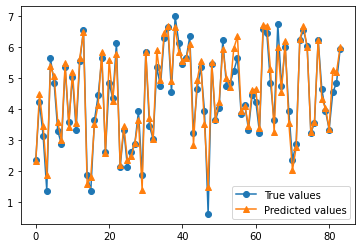

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("Becker_Tube_Dataset.csv")
#Considering all features
columns = ['L(m)', 'D(m)', 'p(Mpa)', 'G(kgm-2s-1)', '∆T_sub(k)', 'q(MWm-2)', 'Z_cr(o/p)']
df = df[(np.abs(stats.zscore(df['Z_cr(o/p)'])) < 3)]
training = df[['L(m)', 'D(m)', 'p(Mpa)', 'G(kgm-2s-1)', '∆T_sub(k)', 'q(MWm-2)', 'Z_cr(o/p)']].to_numpy()
#Standard Scaling the data
scaler = StandardScaler()
X_real = training[:, :6]
y = training[:, 6]
X = scaler.fit_transform(X_real)
# print(X_real.shape)
# print(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# df
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
mse = []
mape = []
r2score = [0]

for i in range(0, 1):
  print("MODEL NO: {}".format(i))
  model = create_model()
  model.compile(loss="mean_squared_error", optimizer='rmsprop')
  model.fit(X_train, y_train, epochs=1000, batch_size=64)

  y_predict = model.predict(X_test)
  #print(y_predict)
  mse.append(mean_squared_error(y_test, y_predict))
  mape.append(mean_absolute_percentage_error(y_test, y_predict))
  
  print(r2score)
  if max(r2score) < r2_score(y_test, y_predict):
    print("test")
    best_model = model
  r2score.append(r2_score(y_test, y_predict))

print(mse)
print(mape)
print(r2score)
#model_json = best_model.to_json()
#with open("model.json", "w") as json_file:
#    json_file.write(model_json)
best_model.save_weights("ANN.h5")
mean_mse = sum(mse) / len(mse)
mean_mape = sum(mape) / len(mape)
mean_r2score = sum(r2score) / (len(r2score)-1)

print("ARTIFICIAL NEURAL NETWORK")
print("Mean MSE: {}".format(mean_mse))
print("Mean MAPE: {}".format(mean_mape))
print("Mean R2SCORE: {}".format(mean_r2score))

y_predict = best_model.predict(X_test)
# print(y_predict)
# print(y_test)
import matplotlib.pyplot as plt
plt.plot(y_test, label="True values", marker='o')
plt.plot(y_predict, label="Predicted values", marker = '^')
plt.legend()

ARTIFICIAL NEURAL NETWORK WITH mRMR FEATURES = 5

MODEL NO: 0
Epoch 1/1000
6/6 [==============================] - 1s 4ms/step - loss: 2.2870
Epoch 2/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.7887
Epoch 3/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.6724
Epoch 4/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.5066
Epoch 5/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.5350
Epoch 6/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.5822
Epoch 7/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.4400
Epoch 8/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.5547
Epoch 9/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.4047
Epoch 10/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.5593
Epoch 11/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.5369
Epoch 12/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.3979
Epoch 13/1000
6/6 [==================

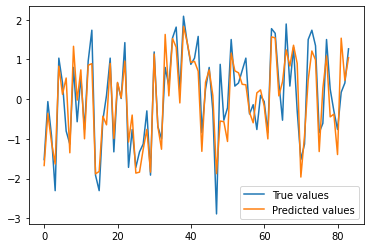

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("Becker_Tube_Dataset.csv")
#Considering all features
columns = ['L(m)', 'p(Mpa)', 'G(kgm-2s-1)', '∆T_sub(k)', 'q(MWm-2)', 'Z_cr(o/p)']
df = df[(np.abs(stats.zscore(df['Z_cr(o/p)'])) < 3)]
training = df[['L(m)', 'p(Mpa)', 'G(kgm-2s-1)', '∆T_sub(k)', 'q(MWm-2)', 'Z_cr(o/p)']].to_numpy()

#Standard Scaling the data
scaler = StandardScaler()
X_real = scaler.fit_transform(training)

X = X_real[:, :5]
y = X_real[:, 5]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)


from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
mse = []
mape = []
r2score = [0]
best_model = create_best_feature_5_model()
for i in range(0, 2):
  model = create_best_feature_5_model()
  print("MODEL NO: {}".format(i))
  model.compile(loss="mean_squared_error", optimizer='rmsprop')
  model.fit(X_train, y_train, epochs=1000, batch_size=64)

  y_predict = model.predict(X_test)
  mse.append(mean_squared_error(y_test, y_predict))
  mape.append(mean_absolute_percentage_error(y_test, y_predict))
  
  if max(r2score) < r2_score(y_test, y_predict):
    best_model = model

  r2score.append(r2_score(y_test, y_predict))

print(mse)
print(mape)
print(r2score)
best_model.save("ANN_mRMR_5.h5")
mean_mse = sum(mse) / len(mse)
mean_mape = sum(mape) / len(mape)
mean_r2score = sum(r2score) / (len(r2score)-1)

print("ARTIFICIAL NEURAL NETWORK WITH mRMR FEATURES")
print("Mean MSE: {}".format(mean_mse))
print("Mean MAPE: {}".format(mean_mape))
print("Mean R2SCORE: {}".format(mean_r2score))

y_predict = best_model.predict(X_test)
import matplotlib.pyplot as plt
plt.plot(y_test, label="True values")
plt.plot(y_predict, label="Predicted values")
plt.legend()

MODEL NO: 0
Epoch 1/1000
6/6 [==============================] - 51s 4ms/step - loss: 0.9083
Epoch 2/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.8595
Epoch 3/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.8260
Epoch 4/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.8053
Epoch 5/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.7842
Epoch 6/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.7641
Epoch 7/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.7483
Epoch 8/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.7399
Epoch 9/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.7254
Epoch 10/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.7141
Epoch 11/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.7107
Epoch 12/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.6952
Epoch 13/1000
6/6 [=================

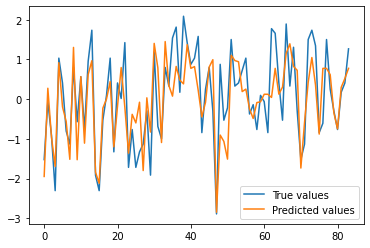

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("Becker_Tube_Dataset.csv")
#Considering all features
columns = ['p(Mpa)', 'G(kgm-2s-1)', '∆T_sub(k)', 'q(MWm-2)', 'Z_cr(o/p)']
df = df[(np.abs(stats.zscore(df['Z_cr(o/p)'])) < 3)]
training = df[['p(Mpa)', 'G(kgm-2s-1)', '∆T_sub(k)', 'q(MWm-2)', 'Z_cr(o/p)']].to_numpy()

#Standard Scaling the data
scaler = StandardScaler()
X_real = scaler.fit_transform(training)

X = X_real[:, :4]
y = X_real[:, 4]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)


from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
mse = []
mape = []
r2score = [0]
best_model = create_best_feature_4_model()
for i in range(0, 2):
  model = create_best_feature_4_model()
  print("MODEL NO: {}".format(i))
  model.compile(loss="mean_squared_error", optimizer='rmsprop')
  model.fit(X_train, y_train, epochs=1000, batch_size=64)

  y_predict = model.predict(X_test)
  mse.append(mean_squared_error(y_test, y_predict))
  mape.append(mean_absolute_percentage_error(y_test, y_predict))


  if max(r2score) < r2_score(y_test, y_predict):
    best_model = model
  r2score.append(r2_score(y_test, y_predict))

print(mse)
print(mape)
print(r2score)
best_model.save("ANN_mRMR_4.h5")
mean_mse = sum(mse) / len(mse)
mean_mape = sum(mape) / len(mape)
mean_r2score = sum(r2score) / len(r2score)

print("ARTIFICIAL NEURAL NETWORK WITH mRMR FEATURES")
print("Mean MSE: {}".format(mean_mse))
print("Mean MAPE: {}".format(mean_mape))
print("Mean R2SCORE: {}".format(mean_r2score))

y_predict = best_model.predict(X_test)
import matplotlib.pyplot as plt
plt.plot(y_test, label="True values")
plt.plot(y_predict, label="Predicted values")
plt.legend()

MODEL NO: 0
Epoch 1/1000
6/6 [==============================] - 1s 4ms/step - loss: 0.9172
Epoch 2/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.8996
Epoch 3/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.8865
Epoch 4/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.8778
Epoch 5/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.8704
Epoch 6/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.8608
Epoch 7/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.8533
Epoch 8/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.8442
Epoch 9/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.8374
Epoch 10/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.8322
Epoch 11/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.8275
Epoch 12/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.8220
Epoch 13/1000
6/6 [==================

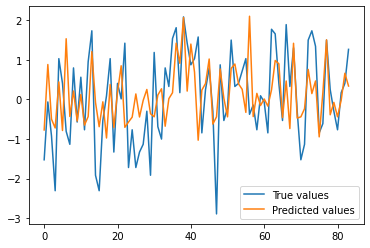

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("Becker_Tube_Dataset.csv")
#Considering all features
columns = ['p(Mpa)', 'G(kgm-2s-1)', '∆T_sub(k)', 'Z_cr(o/p)']
df = df[(np.abs(stats.zscore(df['Z_cr(o/p)'])) < 3)]
training = df[['p(Mpa)', 'G(kgm-2s-1)', '∆T_sub(k)', 'Z_cr(o/p)']].to_numpy()

#Standard Scaling the data
scaler = StandardScaler()
X_real = scaler.fit_transform(training)

X = X_real[:, :3]
y = X_real[:, 3]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)


from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
mse = []
mape = []
r2score = [0]
best_model = create_best_feature_3_model()
for i in range(0, 2):
  model = create_best_feature_3_model()
  print("MODEL NO: {}".format(i))
  model.compile(loss="mean_squared_error", optimizer='rmsprop')
  model.fit(X_train, y_train, epochs=1000, batch_size=64)

  y_predict = model.predict(X_test)
  mse.append(mean_squared_error(y_test, y_predict))
  mape.append(mean_absolute_percentage_error(y_test, y_predict))


  if max(r2score) < r2_score(y_test, y_predict):
    best_model = model

  r2score.append(r2_score(y_test, y_predict))   
   
print(mse)
print(mape)
print(r2score)
best_model.save("ANN_mRMR_3.h5")
mean_mse = sum(mse) / len(mse)
mean_mape = sum(mape) / len(mape)
mean_r2score = sum(r2score) / len(r2score)

print("ARTIFICIAL NEURAL NETWORK WITH mRMR FEATURES")
print("Mean MSE: {}".format(mean_mse))
print("Mean MAPE: {}".format(mean_mape))
print("Mean R2SCORE: {}".format(mean_r2score))

y_predict = best_model.predict(X_test)
import matplotlib.pyplot as plt
plt.plot(y_test, label="True values")
plt.plot(y_predict, label="Predicted values")
plt.legend()

##SVM

Mean MSE: 0.16951705651495083
Mean MAPE: 0.448660856847813
Mean R2SCORE: 0.8701984859694081


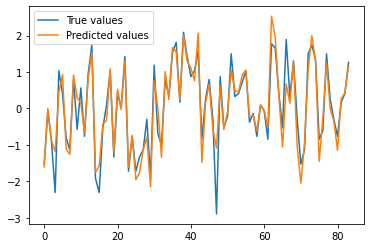

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("Becker_Tube_Dataset.csv")
#Considering all features
columns = ['L(m)', 'D(m)', 'p(Mpa)', 'G(kgm-2s-1)', '∆T_sub(k)', 'q(MWm-2)', 'Z_cr(o/p)']
df = df[(np.abs(stats.zscore(df['Z_cr(o/p)'])) < 3)]
training = df[['L(m)', 'D(m)', 'p(Mpa)', 'G(kgm-2s-1)', '∆T_sub(k)', 'q(MWm-2)', 'Z_cr(o/p)']].to_numpy()

#Standard Scaling the data
scaler = StandardScaler()
X_real = scaler.fit_transform(training)

X = X_real[:, :6]
y = X_real[:, 6]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.svm import SVR
regressor = SVR(kernel='rbf', C = 230)
regressor.fit(X_train,y_train)

y_predict = regressor.predict(X_test)

mean_mse = mean_squared_error(y_test, y_predict)
mean_mape = mean_absolute_percentage_error(y_test, y_predict)
mean_r2score = r2_score(y_test, y_predict)
print("Mean MSE: {}".format(mean_mse))
print("Mean MAPE: {}".format(mean_mape))
print("Mean R2SCORE: {}".format(mean_r2score))

import matplotlib.pyplot as plt
plt.plot(y_test, label="True values")
plt.plot(y_predict, label="Predicted values")
plt.legend()

Mean MSE: 0.3736679590561359
Mean MAPE: 0.8522433385081458
Mean R2SCORE: 0.7138773653379834


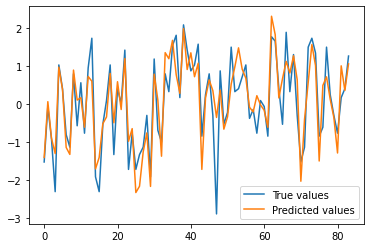

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("Becker_Tube_Dataset.csv")
#Considering all features
columns = ['L(m)', 'p(Mpa)', 'G(kgm-2s-1)', '∆T_sub(k)', 'q(MWm-2)', 'Z_cr(o/p)']
df = df[(np.abs(stats.zscore(df['Z_cr(o/p)'])) < 3)]
training = df[['L(m)', 'p(Mpa)', 'G(kgm-2s-1)', '∆T_sub(k)', 'q(MWm-2)', 'Z_cr(o/p)']].to_numpy()

#Standard Scaling the data
scaler = StandardScaler()
X_real = scaler.fit_transform(training)

X = X_real[:, :5]
y = X_real[:, 5]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)


from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.svm import SVR
regressor = SVR(kernel='rbf', C = 230)
regressor.fit(X_train,y_train)

y_predict = regressor.predict(X_test)

mean_mse = mean_squared_error(y_test, y_predict)
mean_mape = mean_absolute_percentage_error(y_test, y_predict)
mean_r2score = r2_score(y_test, y_predict)
print("Mean MSE: {}".format(mean_mse))
print("Mean MAPE: {}".format(mean_mape))
print("Mean R2SCORE: {}".format(mean_r2score))

import matplotlib.pyplot as plt
plt.plot(y_test, label="True values")
plt.plot(y_predict, label="Predicted values")
plt.legend()

Mean MSE: 0.45104000018753204
Mean MAPE: 0.8107682041060682
Mean R2SCORE: 0.6546325419027281


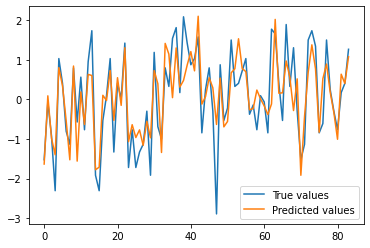

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("Becker_Tube_Dataset.csv")
#Considering all features
columns = ['p(Mpa)', 'G(kgm-2s-1)', '∆T_sub(k)', 'q(MWm-2)', 'Z_cr(o/p)']
df = df[(np.abs(stats.zscore(df['Z_cr(o/p)'])) < 3)]
training = df[['p(Mpa)', 'G(kgm-2s-1)', '∆T_sub(k)', 'q(MWm-2)', 'Z_cr(o/p)']].to_numpy()

#Standard Scaling the data
scaler = StandardScaler()
X_real = scaler.fit_transform(training)

X = X_real[:, :4]
y = X_real[:, 4]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)


from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

from sklearn.svm import SVR
regressor = SVR(kernel='rbf', C = 230)
regressor.fit(X_train,y_train)

y_predict = regressor.predict(X_test)

mean_mse = mean_squared_error(y_test, y_predict)
mean_mape = mean_absolute_percentage_error(y_test, y_predict)
mean_r2score = r2_score(y_test, y_predict)
print("Mean MSE: {}".format(mean_mse))
print("Mean MAPE: {}".format(mean_mape))
print("Mean R2SCORE: {}".format(mean_r2score))

import matplotlib.pyplot as plt
plt.plot(y_test, label="True values")
plt.plot(y_predict, label="Predicted values")
plt.legend()

Mean MSE: 0.8792650405074882
Mean MAPE: 1.566630211576241
Mean R2SCORE: 0.3267348086475542


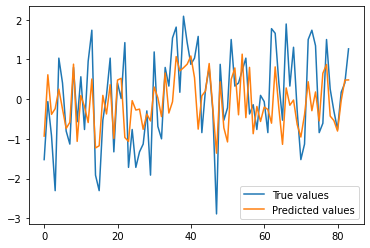

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("Becker_Tube_Dataset.csv")
#Considering all features
columns = ['p(Mpa)', 'G(kgm-2s-1)', '∆T_sub(k)', 'Z_cr(o/p)']
df = df[(np.abs(stats.zscore(df['Z_cr(o/p)'])) < 3)]
training = df[['p(Mpa)', 'G(kgm-2s-1)', '∆T_sub(k)', 'Z_cr(o/p)']].to_numpy()

#Standard Scaling the data
scaler = StandardScaler()
X_real = scaler.fit_transform(training)

X = X_real[:, :3]
y = X_real[:, 3]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)


from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

from sklearn.svm import SVR
regressor = SVR(kernel='rbf', C = 230)
regressor.fit(X_train,y_train)

y_predict = regressor.predict(X_test)

mean_mse = mean_squared_error(y_test, y_predict)
mean_mape = mean_absolute_percentage_error(y_test, y_predict)
mean_r2score = r2_score(y_test, y_predict)
print("Mean MSE: {}".format(mean_mse))
print("Mean MAPE: {}".format(mean_mape))
print("Mean R2SCORE: {}".format(mean_r2score))

import matplotlib.pyplot as plt
plt.plot(y_test, label="True values")
plt.plot(y_predict, label="Predicted values")
plt.legend()
